## 房價價個預測（迴歸）
### 共通事前處理、導入資料

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

#### 資料項目備忘錄

No　索引  
X1 transaction date　交易日期  
X2 house age　屋齡  
X3 distance to the nearest MRT station	離捷運站的距離  
X4 number of convenience stores	  附近超商數  
X5 latitude	    緯度  
X6 longitude	經度  
Y house price of unit area 每坪價格

In [4]:
rdf = pd.read_excel(r'C:\Users\空白\Desktop\Real estate valuation data set.xlsx')
rdf.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### 資料預處理-日期格式

In [5]:
def float_to_date(float_date):
    year = int(float_date)
    days = (float_date - year) * 365  # 假设一年有365天
    date = datetime(year, 1, 1) + timedelta(days=days)
    return date

In [6]:
rdf1 = rdf.copy()
rdf['X1 transaction date'] = rdf['X1 transaction date'].apply(float_to_date)
rdf['X1 transaction date']=rdf['X1 transaction date'].astype('str')
rdf['X1 transaction date']= rdf['X1 transaction date'].map(lambda x : x[0:11] )
rdf['X1 transaction date']=pd.to_datetime(rdf['X1 transaction date'])

In [7]:
rdf['X1 transaction date'].head()

0   2012-11-30
1   2012-11-30
2   2013-08-01
3   2013-07-02
4   2012-10-31
Name: X1 transaction date, dtype: datetime64[ns]

### 查看各變項與房價的關係
以scatter散布圖查看

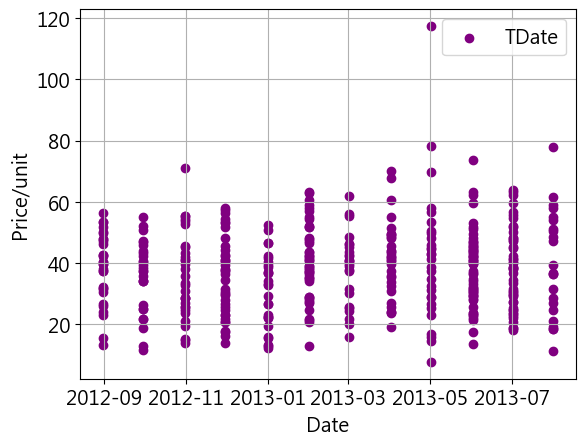

In [14]:
plt.scatter(rdf['X1 transaction date'],rdf['Y house price of unit area'],color='purple',label='TDate')
plt.xlabel('Date')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

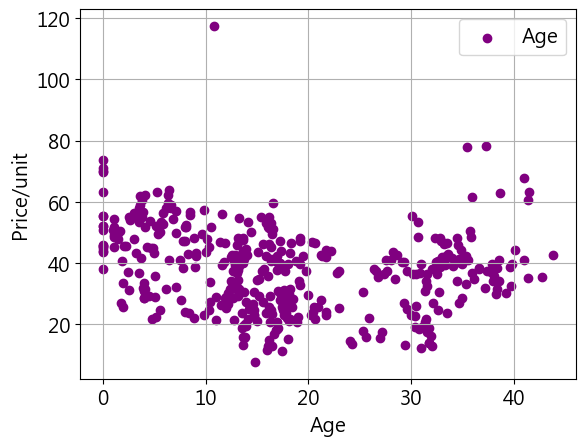

In [15]:
plt.scatter(rdf['X2 house age'],rdf['Y house price of unit area'],color='purple',label='Age')
plt.xlabel('Age')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

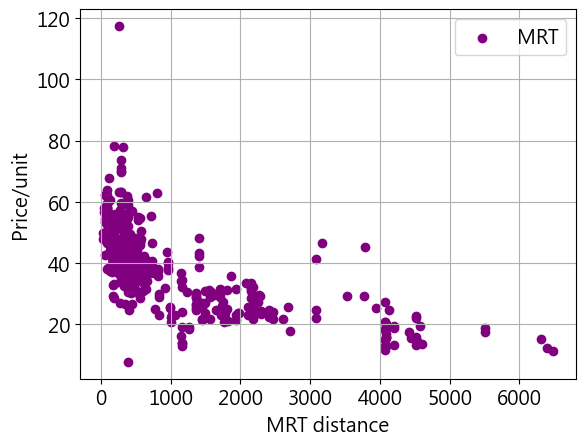

In [16]:
plt.scatter(rdf['X3 distance to the nearest MRT station'],rdf['Y house price of unit area'],color='purple',label='MRT')
plt.xlabel('MRT distance')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

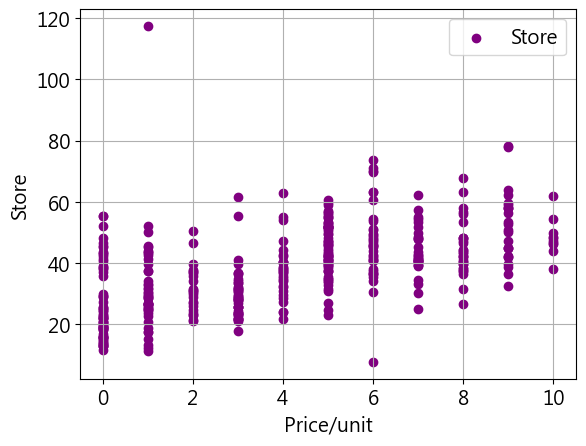

In [17]:
plt.scatter(rdf['X4 number of convenience stores'],rdf['Y house price of unit area'],color='purple',label='Store')
plt.xlabel('Price/unit')
plt.ylabel('Store')
plt.legend()
plt.grid()
plt.show()

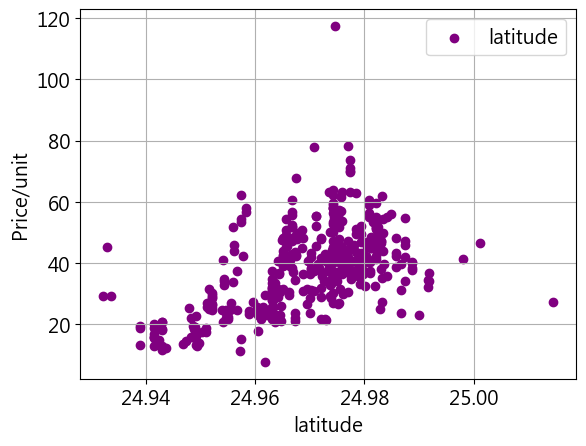

In [18]:
plt.scatter(rdf['X5 latitude'],rdf['Y house price of unit area'],color='purple',label='latitude')
plt.xlabel('latitude')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

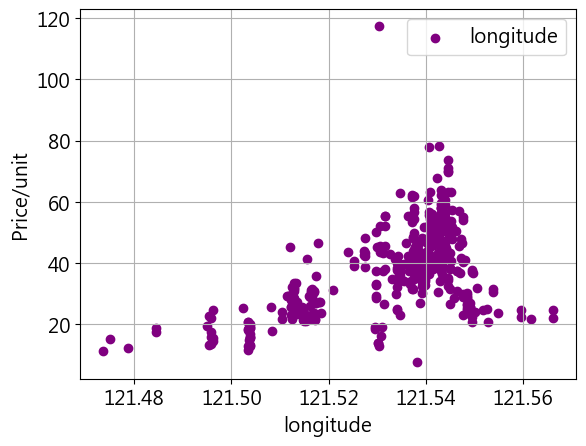

In [19]:
plt.scatter(rdf['X6 longitude'],rdf['Y house price of unit area'],color='purple',label='longitude')
plt.xlabel('longitude')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

### 可以大概看出幾點:
* X2 house age(屋齡)  
  屋齡介於20-30年間的物件成交量明顯較少，單價不高  
  
* X3 distance to the nearest MRT station(與捷運站的距離)  
  距離捷運站的物件成交量多、價格也高  
  
* X5 latitude(緯度)  
  主要的物件大多位於24.96~24.99之間  
  
* X6 longitude(經度)  
  主要的物件大多位於121.53~121.55之間   

### 策略
* X5緯度、X6經度每個區間的價格變動明顯，以兩個變項區間為區格產生新變項['loc_price']

In [20]:
lat = pd.cut(rdf['X5 latitude'],[24.94,24.96,24.98,25.00])
lon = pd.cut(rdf['X6 longitude'],[121.48,121.50,121.52,121.55])

In [21]:
location= rdf.pivot_table('Y house price of unit area',index=[lat,lon],aggfunc='mean')
location.columns= ['price']
location

price
X5 latitude    X6 longitude               
(24.94, 24.96] (121.48, 121.5]   17.858333
               (121.5, 121.52]   18.461111
               (121.52, 121.55]  32.530556
(24.96, 24.98] (121.5, 121.52]   26.442857
               (121.52, 121.55]  43.962121
(24.98, 25.0]  (121.5, 121.52]   31.900000
               (121.52, 121.55]  44.995890

### 以分組區間來看能以平均價格在20以下, 20-30, 30-40, 40以上做4個區間

In [29]:
rdf.loc[(rdf['X5 latitude']>=24.96) & (rdf['X5 latitude']<=25.01459)&
        (rdf['X6 longitude']>=121.52) & (rdf['X6 longitude']<=121.56627),'loc_price']=4
rdf.loc[(rdf['X5 latitude']>=93207) & (rdf['X5 latitude']<=24.96)&
        (rdf['X6 longitude']>=121.52) & (rdf['X6 longitude']<=121.56627),'loc_price']=3
rdf.loc[(rdf['X5 latitude']>=24.98) & (rdf['X5 latitude']<=25.01459)&
        (rdf['X6 longitude']>=121.50) & (rdf['X6 longitude']<=121.52),'loc_price']=3
rdf.loc[(rdf['X5 latitude']>=24.96) & (rdf['X5 latitude']<=24.98)&
        (rdf['X6 longitude']>=121.50) & (rdf['X6 longitude']<=121.52),'loc_price']=2
rdf.loc[(rdf['X5 latitude']>=24.93207) & (rdf['X5 latitude']<=24.96)&
        (rdf['X6 longitude']>=121.47353) & (rdf['X6 longitude']<=121.52),'loc_price']=1

### Note: 檢查缺失值時發現有NAN，推測原因如下:  
* X5緯度, X6經度在分組時設定的不夠精細  
  
### 解決策略  
* 分別查看X5,X6有缺失值的最大及最小值，再依範圍賦值

In [30]:
rdf['loc_price'].isnull().sum()

0

In [31]:
print(rdf.loc[rdf['loc_price'].isnull(),'X5 latitude'].min())
print(rdf.loc[rdf['loc_price'].isnull(),'X5 latitude'].max())

nan
nan


In [25]:
print(rdf.loc[(rdf['loc_price'].isnull())&(rdf['X5 latitude']<=24.96),'X6 longitude'].min())
print(rdf.loc[(rdf['loc_price'].isnull())&(rdf['X5 latitude']<=24.96),'X6 longitude'].max())

121.52954
121.56627


### 對照表之後都位於值為3的區間，填入3

In [32]:
rdf.loc[rdf['loc_price'].isnull(),'loc_price']=3

In [33]:
rdf['loc_price'].isnull().sum()

0

### 以散布圖觀察新欄位與每坪單價之關係  
推測原因:因為是以"平均"價格去計算，每組都會有大於或小於區間的值，造成有明顯區別但是有溢出標準與重複性高的情況  
  
解決方式:以第一新變項['loc_price']創立第二新變項['lprice']  
* 經觀察後多數成交價大多位於20~60  
* 考慮到此標準上下也有值，把區間訂為0~80  
* 以40為分界線，把4個區間簡化為兩個 


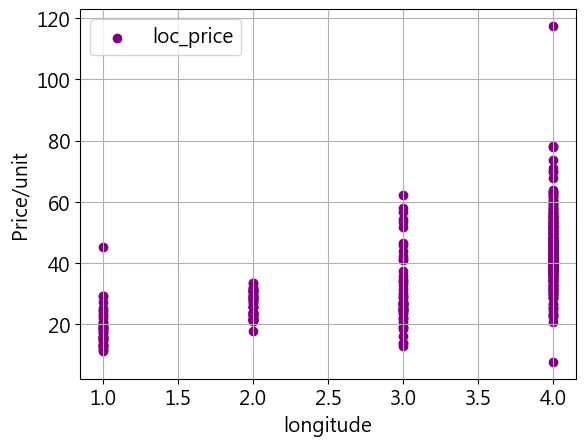

In [34]:
plt.scatter(rdf['loc_price'],rdf['Y house price of unit area'],color='purple',label='loc_price')
plt.xlabel('longitude')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

In [35]:
rdf.loc[rdf['loc_price']==1,'lprice']=1
rdf.loc[rdf['loc_price']==2,'lprice']=1
rdf.loc[(rdf['loc_price']==3 ) & (rdf['Y house price of unit area']<=40),'lprice']=1
rdf.loc[(rdf['loc_price']==4 ) & (rdf['Y house price of unit area']<=40),'lprice']=1
rdf.loc[(rdf['loc_price']==3 ) & (rdf['Y house price of unit area']>40),'lprice']=2
rdf.loc[(rdf['loc_price']==4 ) & (rdf['Y house price of unit area']>40),'lprice']=2
rdf.loc[(rdf['lprice']==1) & (rdf['Y house price of unit area']>40),'lprice']=2

### 查看第二新變項與整體數據缺失值情況, 繪製散布圖觀察第二新變項

In [36]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   No                                      414 non-null    int64         
 1   X1 transaction date                     414 non-null    datetime64[ns]
 2   X2 house age                            414 non-null    float64       
 3   X3 distance to the nearest MRT station  414 non-null    float64       
 4   X4 number of convenience stores         414 non-null    int64         
 5   X5 latitude                             414 non-null    float64       
 6   X6 longitude                            414 non-null    float64       
 7   Y house price of unit area              414 non-null    float64       
 8   loc_price                               414 non-null    float64       
 9   lprice                                  414 non-null  

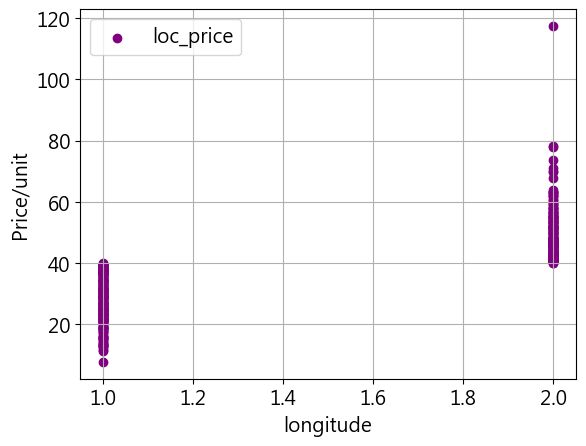

In [37]:
plt.scatter(rdf['lprice'],rdf['Y house price of unit area'],color='purple',label='loc_price')
plt.xlabel('longitude')
plt.ylabel('Price/unit')
plt.legend()
plt.grid()
plt.show()

### 屋齡在20~30這個區間成交量較少,確認後大概佔總量的1成  
### 價格約在每坪50以下且分布平均，暫不考慮處理

In [38]:
age_23= rdf.loc[(rdf['X2 house age']>=20)&(rdf['X2 house age']<=30),'X2 house age']
age_23.count()

44

### 丟棄['No']欄位(只是單純的編號), 重新編排欄位順序

In [39]:
rdf.drop('No',axis=1, inplace=True)

In [40]:
rdf=rdf.iloc[:,[0,1,2,3,4,5,8,6]]
rdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,lprice,Y house price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,1.0,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,2.0,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,2.0,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,2.0,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,2.0,43.1


### 準備以模型分析  
步驟如下:  
* 確認資料範圍, 此次先排除第二新變項['lprice']以原始欄位進行分析
* 導入模型, 分割資料, 確認分割後資料大小 
* 以Pipeline標準化資料, 初始化及訓練模型

In [41]:
x = rdf.iloc[:,1:6]
y = rdf['Y house price of unit area'].values
x.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
x_train.shape, y_train.shape

((331, 5), (331,))

In [44]:
Pip_lr = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',LinearRegression())])

Pip_rf = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',RandomForestRegressor())])

Pip_dt = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',DecisionTreeRegressor())])

Pip_kn = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',KNeighborsRegressor())])

Pip_XG = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',XGBRegressor())])
pipelines = [Pip_lr, Pip_rf, Pip_dt, Pip_kn, Pip_XG]

pipe_dict = {0:'LinearRegression', 1:'RandomForestRegressor', 2:'DecisionTreeRegressor', 3:'KNeighborsRegressor',4:'XGBRegressor'}

for pipe in pipelines:
    pipe.fit(x_train, y_train)

### 檢查各模型的r2值, 預測精準度  
以LinearRegression, RandomForestRegressor,KNeighborsRegressor 3個較為突出

In [45]:
# mods= [Pip_rf, Pip_dt, Pip_XG]
mods= [Pip_lr, Pip_rf, Pip_dt, Pip_kn, Pip_XG]
for index, mod in enumerate(mods):
    name = mod.named_steps['Regressor'].__class__.__name__
    y_pred =mod.predict(x_test)
    test_score=mod.score(x_test,y_test)
    r2 = r2_score(y_test, y_pred)
    print(f'[{index}] {name} r2_score: {r2:.2f}, Test Accuract:{test_score:.2f}')

[0] LinearRegression r2_score: 0.64, Test Accuract:0.64
[1] RandomForestRegressor r2_score: 0.69, Test Accuract:0.69
[2] DecisionTreeRegressor r2_score: 0.54, Test Accuract:0.54
[3] KNeighborsRegressor r2_score: 0.66, Test Accuract:0.66
[4] XGBRegressor r2_score: 0.49, Test Accuract:0.49


### 查看R2交叉驗證分數  
LinearRegression 驗證分數低於r2分數, 可能需要調整  
XGBRegressor 驗證分數明顯高於r2分數，泛化能力可能較好

In [46]:
cv_result_rms=[]
for i, model in enumerate(pipelines):
    cv_score= cross_val_score(model, x_train, y_train, scoring='r2', cv=10)
    cv_result_rms.append(cv_score)
    print('%s: %f' % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.545838
RandomForestRegressor: 0.687744
DecisionTreeRegressor: 0.454716
KNeighborsRegressor: 0.641626
XGBRegressor: 0.632804


### 重要性分析  
以樹型模型查看重要特徵  
* 三個模型最重要特徵皆為X3(與捷運站的距離)  
* 三個模型在排名2-3都有X5(緯度)指標，且有兩個有X2(屋齡)

,RandomForestRegressor
features,
X3 distance to the nearest MRT station,0.575
X2 house age,0.183
X5 latitude,0.114
X6 longitude,0.106
X4 number of convenience stores,0.023


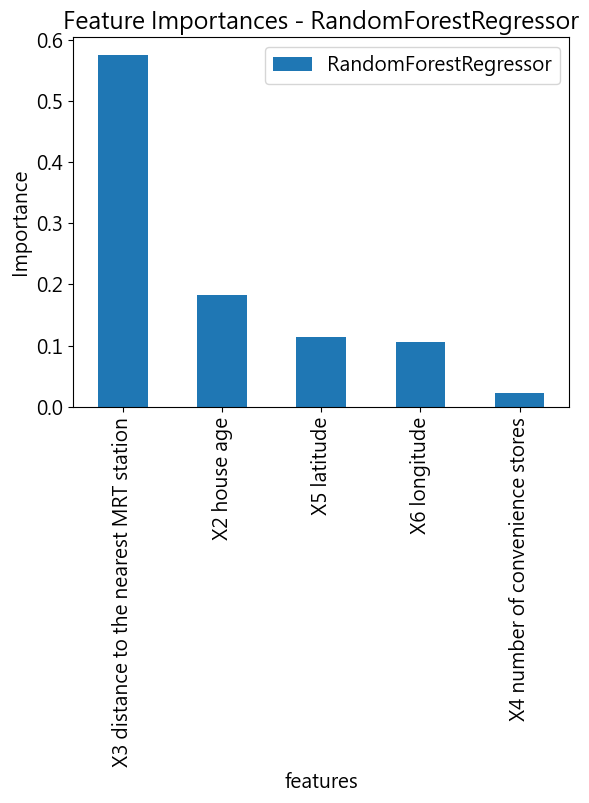

,DecisionTreeRegressor
features,
X3 distance to the nearest MRT station,0.570
X2 house age,0.227
X5 latitude,0.100
X6 longitude,0.076
X4 number of convenience stores,0.026


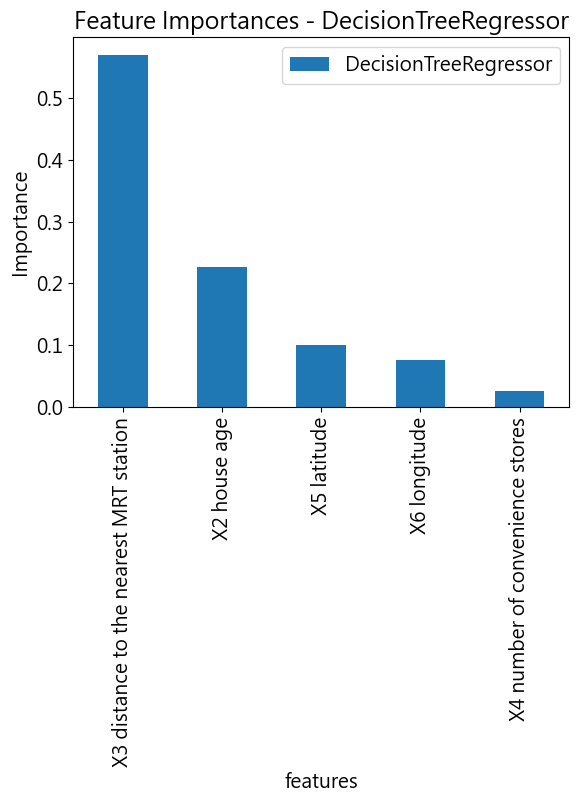

,XGBRegressor
features,
X3 distance to the nearest MRT station,0.545
X6 longitude,0.192
X5 latitude,0.150
X2 house age,0.068
X4 number of convenience stores,0.044


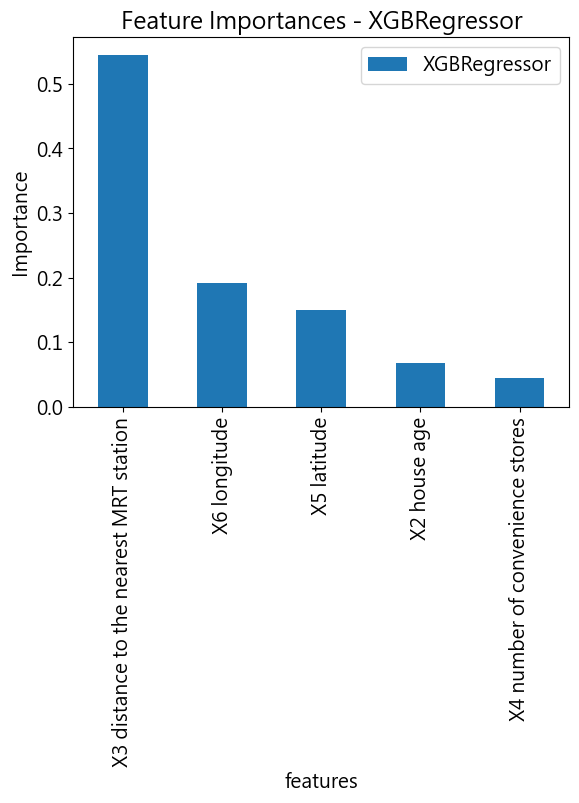

In [47]:
import re
mods= [Pip_rf, Pip_dt, Pip_XG]
for i,mod in enumerate(mods):
    name = mod.named_steps['Regressor'].__class__.__name__
    importances = pd.DataFrame({'features':rdf.iloc[:,1:6].columns,f'{name}':np.round(mod.named_steps['Regressor'].feature_importances_,3)})
    importances = importances.sort_values(f'{name}',ascending=False).set_index('features')
    display(importances)
    importances.plot.bar()
    plt.title(f'Feature Importances - {name}')
    plt.ylabel('Importance')
    plt.show()

### 第二次分析, 此次加入第二新變項['lprice']
步驟如下:  
* 確認資料範圍
* 建立新模型, 分割資料, 確認分割後資料大小 
* 以Pipeline標準化資料, 初始化及訓練模型

In [48]:
x = rdf.iloc[:,1:7]
y = rdf['Y house price of unit area'].values
x.head()
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
x_train.shape, y_train.shape

((331, 6), (331,))

In [50]:
Pip_lr2 = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',LinearRegression())])

Pip_rf2 = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',RandomForestRegressor())])

Pip_dt2 = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',DecisionTreeRegressor())])

Pip_kn2 = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',KNeighborsRegressor())])

Pip_XG2 = Pipeline([('scaler',StandardScaler()),
                   ('Regressor',XGBRegressor())])
pipelines2 = [Pip_lr2, Pip_rf2, Pip_dt2, Pip_kn2, Pip_XG2]

pipe_dict = {0:'LinearRegression', 1:'RandomForestRegressor', 2:'DecisionTreeRegressor', 3:'KNeighborsRegressor',4:'XGBRegressor'}

for pipe in pipelines2:
    pipe.fit(x_train, y_train)

### 各模型r2值及預測分數  
差異:  
* 相較於以原始欄位進行分析，加入新變數後除了2號決策樹下降之外以外其他模型分數都有增長

In [51]:
mods =[Pip_lr2, Pip_rf2, Pip_dt2, Pip_kn2, Pip_XG2]
for index, mod in enumerate(mods):
    name = mod.named_steps['Regressor'].__class__.__name__
    y_pred =mod.predict(x_test)
    test_score=mod.score(x_test,y_test)
    r2 = r2_score(y_test, y_pred)
    print(f'[{index}] {name} r2_score: {r2:.2f}, Test Accuract:{test_score:.2f}')

[0] LinearRegression r2_score: 0.79, Test Accuract:0.79
[1] RandomForestRegressor r2_score: 0.75, Test Accuract:0.75
[2] DecisionTreeRegressor r2_score: 0.15, Test Accuract:0.15
[3] KNeighborsRegressor r2_score: 0.78, Test Accuract:0.78
[4] XGBRegressor r2_score: 0.62, Test Accuract:0.62


### R2交叉驗證  
一樣除了決策樹之外其他交叉驗證分數都有明顯增長

In [52]:
cv_result_rms=[]
for i, model in enumerate(pipelines2):
    cv_score= cross_val_score(model, x_train, y_train, scoring='r2', cv=10)
    cv_result_rms.append(cv_score)
    print('%s: %f' % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.730027
RandomForestRegressor: 0.766276
DecisionTreeRegressor: 0.666633
KNeighborsRegressor: 0.732612
XGBRegressor: 0.763630


### 重要性分析(加入新變數['lprice'])
* 三個模型的第一重要性特徵都變為['lprice']，且比重皆大於60%  
* 原本的X3(與捷運站的距離)還是維持在排名2-3但是比重大幅下降

### 結論:  
* 雖然新變數['lprice']是強硬的2分法去判別，但就分數結論來說還算正面
* 第一次分析結果的重要性來看，如果還要再調整變項輸入屋齡似乎是個可以著手的方向

,RandomForestRegressor
features,
lprice,0.616
X3 distance to the nearest MRT station,0.106
X2 house age,0.097
X5 latitude,0.093
X6 longitude,0.069
X4 number of convenience stores,0.019


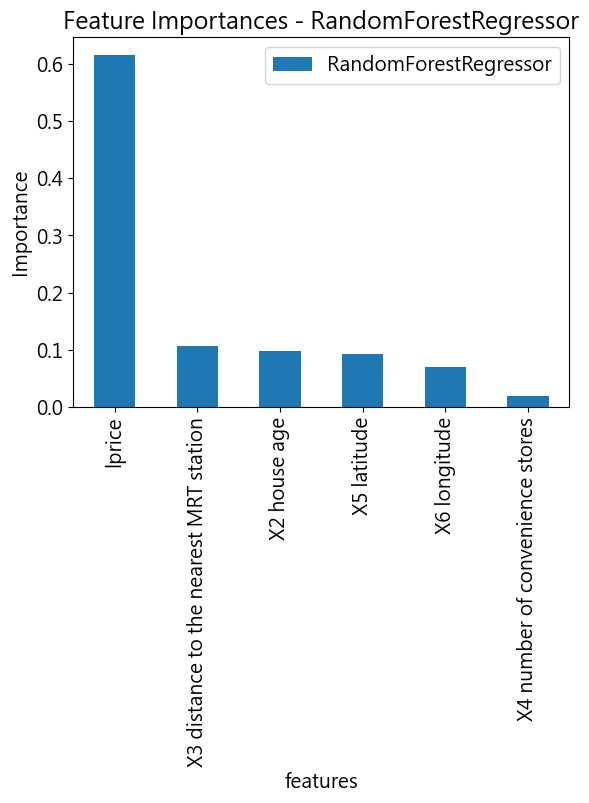

,DecisionTreeRegressor
features,
lprice,0.609
X3 distance to the nearest MRT station,0.132
X6 longitude,0.104
X2 house age,0.068
X5 latitude,0.063
X4 number of convenience stores,0.025


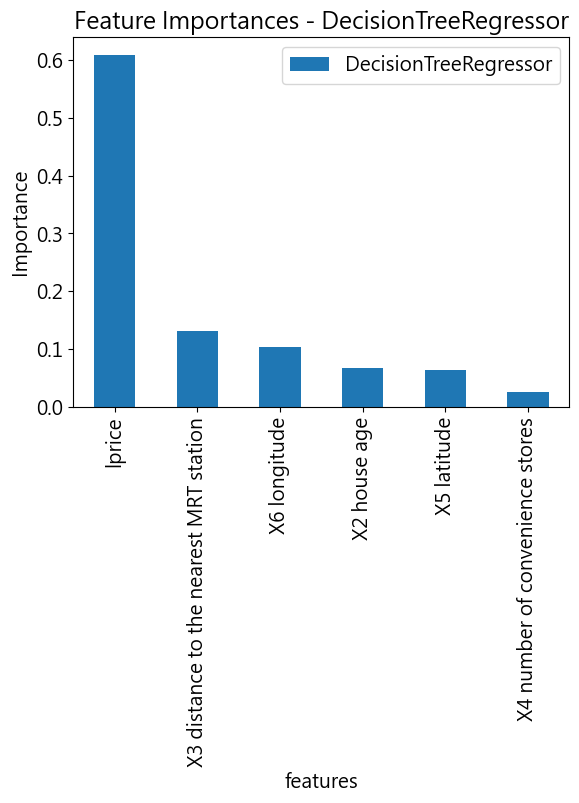

,XGBRegressor
features,
lprice,0.932
X5 latitude,0.022
X3 distance to the nearest MRT station,0.019
X6 longitude,0.015
X4 number of convenience stores,0.008
X2 house age,0.005


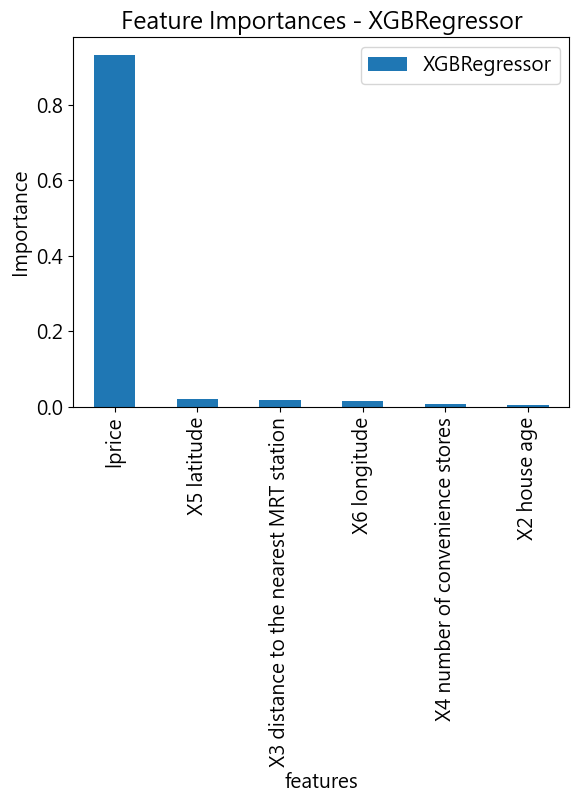

In [53]:
import re
mods= [Pip_rf2, Pip_dt2, Pip_XG2]
for i,mod in enumerate(mods):
    name = mod.named_steps['Regressor'].__class__.__name__
    importances = pd.DataFrame({'features':rdf.iloc[:,1:7].columns,f'{name}':np.round(mod.named_steps['Regressor'].feature_importances_,3)})
    importances = importances.sort_values(f'{name}',ascending=False).set_index('features')
    display(importances)
    importances.plot.bar()
    plt.title(f'Feature Importances - {name}')
    plt.ylabel('Importance')
    plt.show()

In [54]:
mods= [Pip_rf2, Pip_dt2, Pip_XG2]
for index, mod in enumerate(mods):
    name = mod.named_steps['Regressor'].__class__.__name__
    cv_score=cross_val_score(mod,x_train, y_train, cv=5).mean()
    test_score= mod.score(x_test, y_test)
    y_pred =mod.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f'[{index}] {name} r2_score: {r2:.2f}, Test Accuract:{test_score:.2f}')

[0] RandomForestRegressor r2_score: 0.75, Test Accuract:0.75
[1] DecisionTreeRegressor r2_score: 0.15, Test Accuract:0.15
[2] XGBRegressor r2_score: 0.62, Test Accuract:0.62
